# Stock Market Price Prediction
## Business Objective:
Predict the apple stock market price for next 30 days. 
There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock. 
   1. Split the last year into a test set- can you build a model to predict stock price?
   2. Find trends in short term, or long term trends?
   3. Understand how it is impacted from external factors or any big external events?
   4. Forecast for next 30 days.


## 1. Import the Libraries

In [195]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

## 2. Import the Dataset 

In [196]:
# Converting Date column to 'Datatime' data type, further making it index column
data = pd.read_csv(r'C:\Users\PC\Downloads\Data Science\project\AAPL.csv', parse_dates = ['Date'],index_col = 0)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [197]:
#No.of rows & columns 
data.shape

(2011, 6)

In [198]:
#Checking for null values and data type of columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [199]:
# checking for the duplicate values
data.duplicated().sum()

0

In [200]:
# Describing the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [201]:
#CustomBusinessDay - shows the working days excluding holidays
#USFederalHolidayCalendar - return working days holidays 
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [202]:
# idx1 = pd.Index([2, 1, 3, 4])
# idx2 = pd.Index([3, 4, 5, 6])
# idx1.difference(idx2)
# >>Int64Index([1, 2], dtype='int64')
# idx1.difference(idx2, sort=False)
# >>Int64Index([2, 1], dtype='int64')

my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal) 
print(my_range.difference(data.index))

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [203]:
# deleting extra's dates from 'my range' which are not in actuall dataset 'data'
Cu = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', 
                                                                    '2013-03-29','2014-04-18', '2015-04-03', 
                                                                    '2016-03-25', '2017-04-14', '2018-03-30', 
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=Cu)
print(my_range.difference(data.index))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [204]:
#16 values that are going to be ignored
print(data.index.difference(my_range))

DatetimeIndex(['2012-10-08', '2012-11-12', '2013-10-14', '2013-11-11',
               '2014-10-13', '2014-11-11', '2015-10-12', '2015-11-11',
               '2016-10-10', '2016-11-11', '2017-10-09', '2017-11-10',
               '2018-10-08', '2018-11-12', '2019-10-14', '2019-11-11'],
              dtype='datetime64[ns]', freq=None)


In [205]:
#setting dataset frequency 'CustomBusinessDay'(in above cell) 
df = data.asfreq(Cu)
df.shape

(1995, 6)

In [206]:
#dropping Unnecessary columns
df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
df.head()

,Adj Close
Date,
2012-01-03,50.765709
2012-01-04,51.038536
2012-01-05,51.605175
2012-01-06,52.144630
2012-01-09,52.061932


In [207]:
#Storing the dataset
df.to_csv('new_Apple_data.csv',index = True)

In [208]:
# make columns of weeks,month and Years
df['Year-Week'] =df.index.strftime('%Y-%U')
df['Month'] = df.index.strftime('%Y-%m')
df['Year'] = df.index.strftime('%Y')
df["month"] =df.index.strftime("%b") 
df['Qtr'] = pd.to_datetime(df['Month'].values, format='%Y-%m').astype('period[Q]')

In [209]:
df.Year.value_counts()

2013    250
2014    250
2015    250
2016    250
2017    249
2018    249
2019    249
2012    248
Name: Year, dtype: int64

## 3. Visualization

Text(0, 0.5, 'Adj Close')

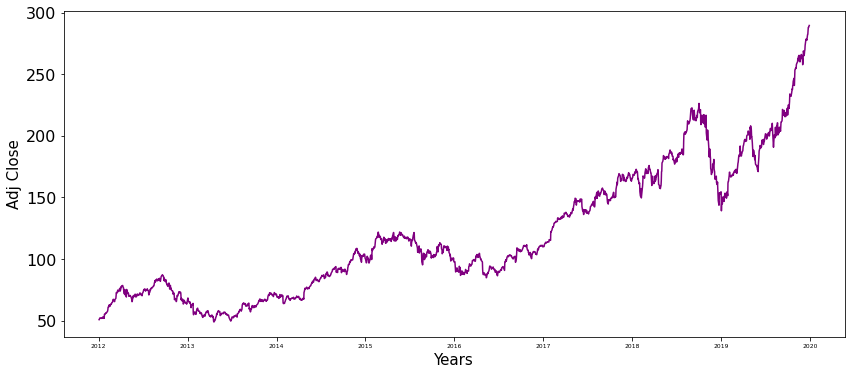

In [210]:
# Yearly chart
fig,ax=plt.subplots(figsize=(14,6))
plt.plot(df['Adj Close'],color = 'purple')
plt.xlabel('Years')
plt.ylabel('Adj Close')

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

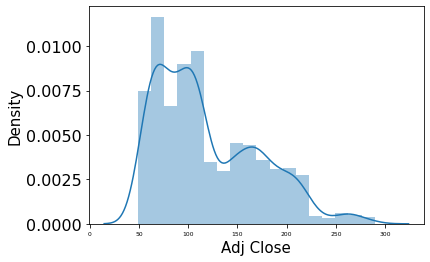

In [211]:
sns.distplot(df['Adj Close'],kde=True)

## 4.Time Series Component

In [212]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 0.98, 'Adj Close decomposition')

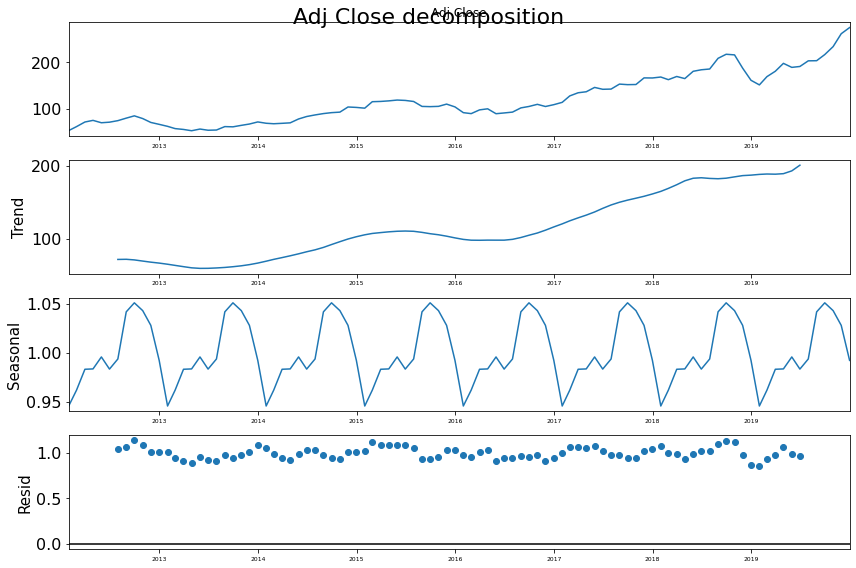

In [213]:
# Aggregating the Time Series to a monthly scaled index
# y = df[['Date','Adj Close']].copy()
# y.set_index('Date', inplace=True)
# y.index = pd.to_datetime(y.index)
y = df['Adj Close'].resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.labelsize'] = 15
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 6

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Adj Close decomposition', fontsize=22)

From the above plot we can see that, the trend component is upward trend that means that closeing price is maximum in every year.

We can see that the seasonal component changes slowly over time & we can see there is repeating patterns so we can say that seasonality is present on our data.


### 4.1 Seasonal Subseries Plot 

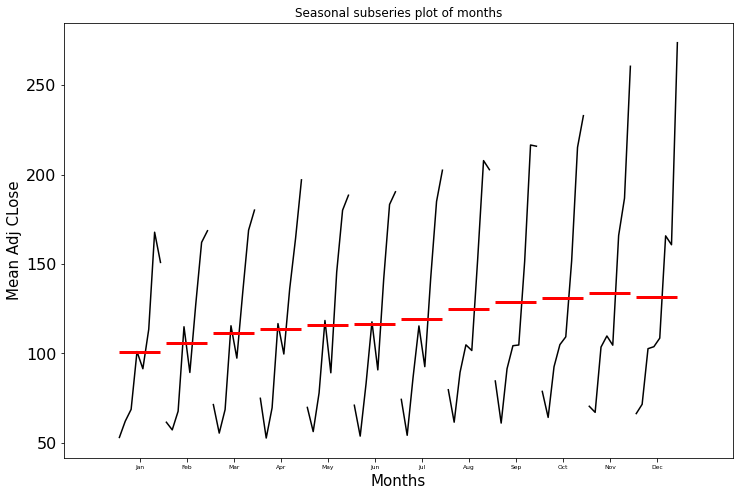

In [214]:
from statsmodels.graphics.tsaplots import quarter_plot,month_plot
month_plot(df['Adj Close'].resample('1M').mean())
plt.title('Seasonal subseries plot of months')
plt.xlabel('Months')
plt.ylabel('Mean Adj CLose')
plt.show()

In above Monthly chart we can see that there is no Monthly Seasonality

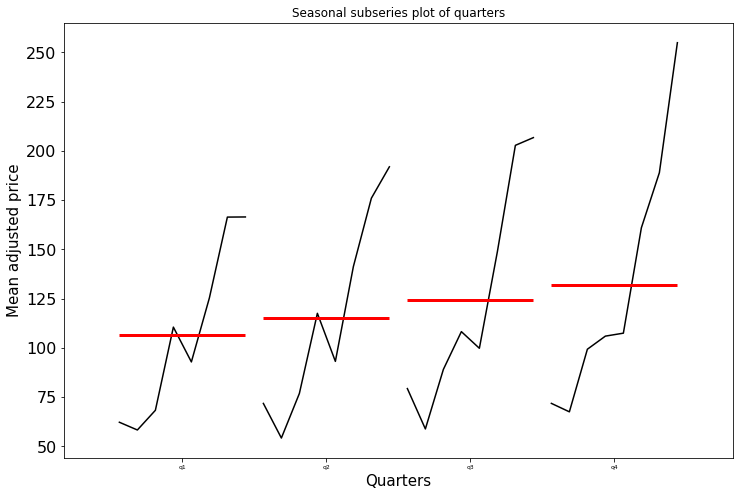

In [215]:
quarter_plot(df['Adj Close'].resample('Q').mean())
plt.title('Seasonal subseries plot of quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean adjusted price')
plt.show()

Here we can se that Data has Quarterly Seasonality

## 5. Testing For Stationarity

In [216]:
from statsmodels.tsa.stattools import adfuller

In [217]:
# test_result=adfuller(df['Adj Close'])
# test_result

In [218]:
def adf_test(series, title=''):
    
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC') 
    
    print('Agumented Dicky-Fuller test')
    labels = ['ADF test statistic :','p-value :','No. of Lags :']
    out = pd.Series(result[0:3],index=labels)

    for key,val in result[4].items():
        out['critical value ({}) :'.format(key)]=val
        
    # .to_string() removes the line "dtype: float64"
    print(out.to_string())          
    
    if result[1] <= 0.05:
        print("\nReject the null hypothesis")
        print("Data is stationary")
    else:
        print("\nFail to reject the null hypothesis")
        print("Data is non-stationary")

In [219]:
adf_test(df['Adj Close'],title='')

Agumented Dicky-Fuller test
ADF test statistic :       1.252371
p-value :                  0.996328
No. of Lags :             17.000000
critical value (1%) :     -3.433662
critical value (5%) :     -2.863003
critical value (10%) :    -2.567549

Fail to reject the null hypothesis
Data is non-stationary


The test statistic is more than the critical values.
The p value is greater than 0.05,
 that's why we failed to reject null hypothesis

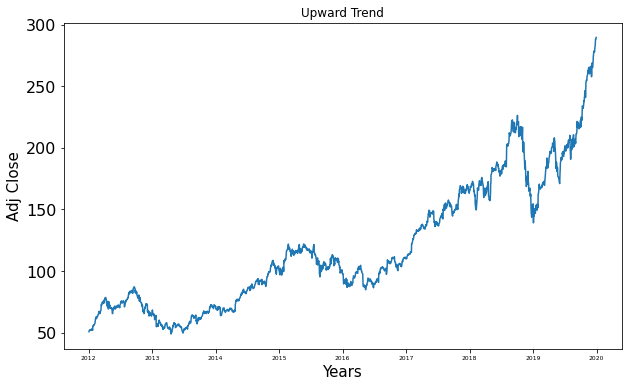

In [220]:
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Upward Trend')
plt.show()

In [221]:
# Differencing y(t)=y(t)-y(t-1)
df[' Adj Close First Difference'] = df['Adj Close'] -df['Adj Close'].shift(1)

In [222]:
# After differencing ADF test
adf_test(df[' Adj Close First Difference'].dropna())

Agumented Dicky-Fuller test
ADF test statistic :     -9.097047e+00
p-value :                 3.690851e-15
No. of Lags :             1.600000e+01
critical value (1%) :    -3.433662e+00
critical value (5%) :    -2.863003e+00
critical value (10%) :   -2.567549e+00

Reject the null hypothesis
Data is stationary


The test statistic is less than the critical values.
The p value is less than 0.05,
 that's why we can reject null hypothesis

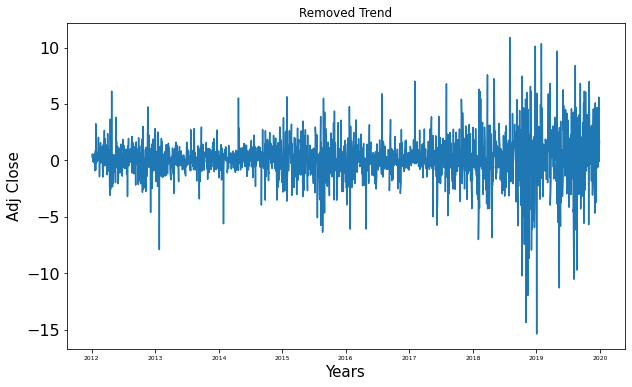

In [223]:
plt.figure(figsize=(10, 6))
plt.plot(df[' Adj Close First Difference'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Removed Trend')
plt.show()

After First Differencing Trend has been removed 

In [224]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

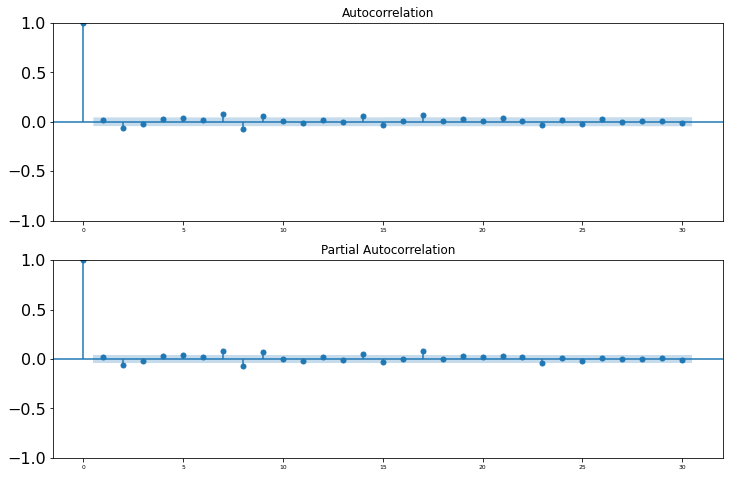

In [225]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax2)

From the above plot we can see that,the ACF & PACF plot start with a lag zero(0) which is the correlation of the time series with itself & therefore results in correlation of 1 .

You can see that a blue area in the ACF & PACF plots indicate the 95% confidence interval & Is an indicator of the significant threshold.

From the plot we choose p=1 & q=1

## 6. Train/Test Split

In [226]:
# Split data into train and test
df_train=df.iloc[:1760]   
df_test=df.iloc[1760:] 

## 7. Model Building

### 7.1 ARIMA Model

In [227]:
from statsmodels.tsa.arima_model import ARIMA

In [228]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [229]:
model = sm.tsa.arima.ARIMA(df_train['Adj Close'], order=(1,1,1))
model_fit = model.fit()

In [230]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1760
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3586.498
Date:                Wed, 17 May 2023   AIC                           7178.995
Time:                        16:52:38   BIC                           7195.413
Sample:                    01-03-2012   HQIC                          7185.063
                         - 01-22-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8404      0.104     -8.119      0.000      -1.043      -0.638
ma.L1          0.8682      0.097      8.939      0.000       0.678       1.059
sigma2         3.4556      0.051     68.164      0.000       3.356       3.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6558.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.56   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the above analysis, we can see that the P-value of ar.L1 model & ma.L1 model is 0.00 which is less than 0.05, that mean's our data has highly significant

<AxesSubplot:xlabel='Date'>

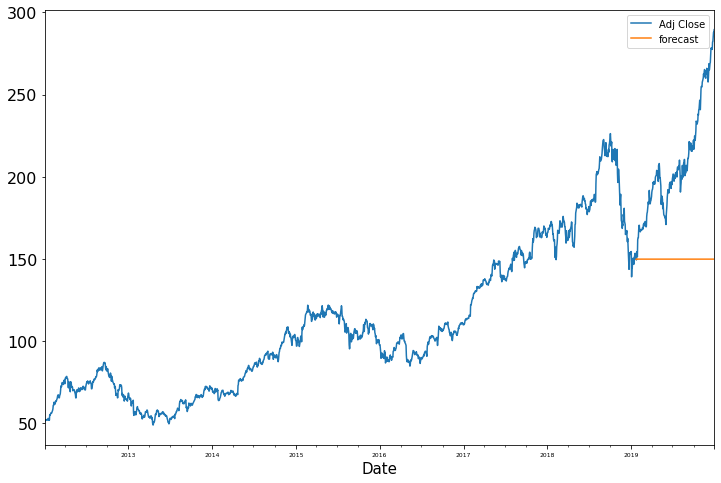

In [231]:
df['forecast']=model_fit.predict(start=1760,end=1994)

df[['Adj Close','forecast']].plot(figsize=(12,8))

In [232]:
df[['Adj Close','forecast']].iloc[1760:]

,Adj Close,forecast
Date,,
2019-01-23,150.602600,149.787781
2019-01-24,149.408875,149.962731
2019-01-25,154.359848,149.815703
2019-01-28,152.931305,149.939266
2019-01-29,151.346207,149.835424
...,...,...
2019-12-23,282.054138,149.882842
2019-12-24,282.322266,149.882842
2019-12-26,287.923645,149.882842


In [241]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape1 = np.mean(np.abs(df['forecast'] - df['Adj Close'])/np.abs(df['Adj Close']))
mape1

0.2637413671735738

In [242]:
#Root Mean Squared Error (RMSE) - ARIMA
rmse1 = np.mean((df['forecast'] - df['Adj Close'])**2)**.5 
rmse1

66.82204808490525

### 7.2 SARIMA Model(Monthly)

In [248]:
model1=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,30))
model1_fit=model1.fit()

In [249]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3591.005
Date:                            Wed, 17 May 2023   AIC                           7192.011
Time:                                    17:28:46   BIC                           7219.287
Sample:                                01-03-2012   HQIC                          7202.100
                                     - 01-22-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3737     66.990      0.006      0.996    -130.925     131.672
ma.L1         -0.3738     66.986     -0.006      0.996    -131.664     130.916
ar.S.L30      -0.0657      0.020     -3.273      0.001      -0.105      -0.026
ma.S.L30      -0.9649      0.013    -76.082      0.000      -0.990      -0.940
sigma2         3.5524      0.058     61.261      0.000       3.439       3.666
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              5925.05
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

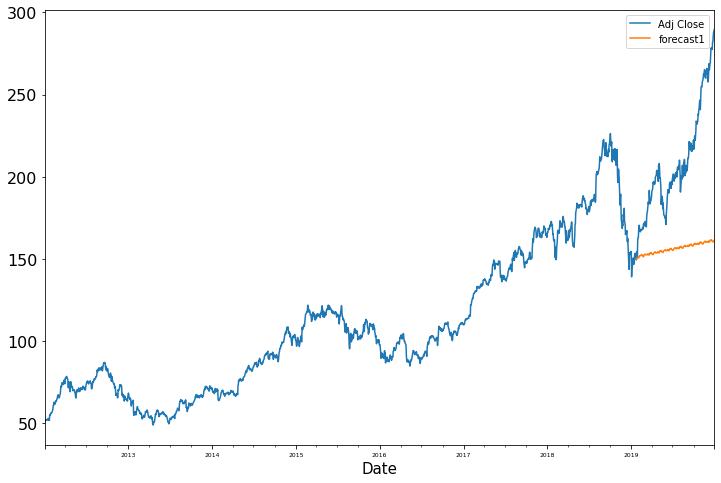

In [250]:
df['forecast1']=model1_fit.predict(start=1760,end=1994,dynamic=True,exog=None)
df[['Adj Close','forecast1']].plot(figsize=(12,8))

In [251]:
df0 = df[['Adj Close','forecast1']].iloc[1760:]


In [252]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape2 = np.mean(np.abs(df0['forecast1'] - df0['Adj Close'])/np.abs(df0['Adj Close']))
mape2

0.23450254612664792

In [253]:
#Root Mean Squared Error (RMSE) - ARIMA
rmse2 = np.mean((df0['forecast1'] - df0['Adj Close'])**2)**.5 
rmse2

59.95172079146003

### 7.3 SARIMA Model(Quaterly)

In [182]:
model2=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,63))
model2_fit=model2.fit()

In [183]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 63)   Log Likelihood               -3551.859
Date:                            Wed, 17 May 2023   AIC                           7113.718
Time:                                    11:00:52   BIC                           7140.898
Sample:                                01-03-2012   HQIC                          7123.781
                                     - 01-22-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9496      0.038    -25.006      0.000      -1.024      -0.875
ma.L1          0.9643      0.033     29.421      0.000       0.900       1.029
ar.S.L63      -0.0531      0.029     -1.848      0.065      -0.109       0.003
ma.S.L63      -0.8688      0.019    -45.077      0.000      -0.907      -0.831
sigma2         3.6510      0.056     65.111      0.000       3.541       3.761
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              5674.61
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               4.70   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

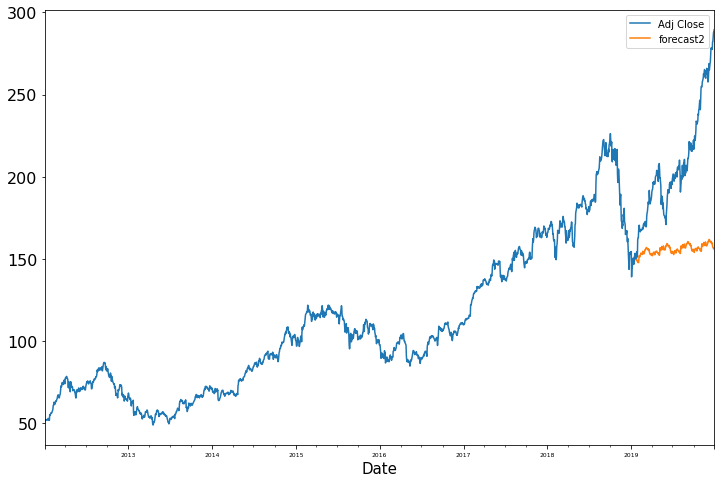

In [184]:
df['forecast2']=model2_fit.predict(start=1760,end=1994,dynamic=True,exog=None)
df[['Adj Close','forecast2']].plot(figsize=(12,8))

In [185]:
df1 = df[['Adj Close','forecast1','forecast2']].iloc[1760:]
df1

,Adj Close,forecast1,forecast2
Date,,,
2019-01-23,150.602600,150.043221,149.563206
2019-01-24,149.408875,149.936626,149.338772
2019-01-25,154.359848,150.190061,149.024369
2019-01-28,152.931305,150.199145,148.984242
2019-01-29,151.346207,150.372432,148.311940
...,...,...,...
2019-12-23,282.054138,160.716014,157.696455
2019-12-24,282.322266,160.369359,157.022072
2019-12-26,287.923645,160.500485,156.377371


In [245]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape3 = np.mean(np.abs(df1['forecast2'] - df1['Adj Close'])/np.abs(df1['Adj Close']))
mape3

0.23557771017285598

In [246]:
rmse3 = np.mean((df1['forecast2'] - df1['Adj Close'])**2)**.5 
rmse3

60.82207917138652

In [254]:
data1 = {'Models':['ARIMA','SARIMA(Monthly)',
                   'SARIMA(Qauterly)',
                   ],
       'Root Mean Squared Error':[rmse1,rmse2,rmse3]}
Model = pd.DataFrame(data1)
Model = Model.sort_values('Root Mean Squared Error').reset_index(drop=True)
Model

,Models,Root Mean Squared Error
0,SARIMA(Monthly),59.951721
1,SARIMA(Qauterly),60.822079
2,ARIMA,66.822048


SARIMA monthly model has better RMSE score comparison to other

### 7.4 Selected SARIMA Model

In [188]:
#Training Model with all data
model3=sm.tsa.statespace.SARIMAX(df['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,30))
model3_fit=model3.fit()

In [189]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1995
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 63)   Log Likelihood               -4218.585
Date:                            Wed, 17 May 2023   AIC                           8447.170
Time:                                    11:03:25   BIC                           8474.999
Sample:                                01-03-2012   HQIC                          8457.406
                                     - 12-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8314      0.088     -9.397      0.000      -1.005      -0.658
ma.L1          0.8637      0.081     10.637      0.000       0.705       1.023
ar.S.L63      -0.0088      0.023     -0.388      0.698      -0.053       0.036
ma.S.L63      -0.9184      0.014    -67.914      0.000      -0.945      -0.892
sigma2         4.3517      0.071     61.265      0.000       4.212       4.491
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              3953.16
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               6.28   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forcasting 30 Days Price

In [190]:
f = pd.DataFrame(model3_fit.forecast(30))
f

,predicted_mean
2019-12-31,290.011062
2020-01-02,290.209586
2020-01-03,290.210424
2020-01-06,290.227494
2020-01-07,289.833614
2020-01-08,290.451883
2020-01-09,290.914847
2020-01-10,291.403605
2020-01-13,291.551310
2020-01-14,291.942877


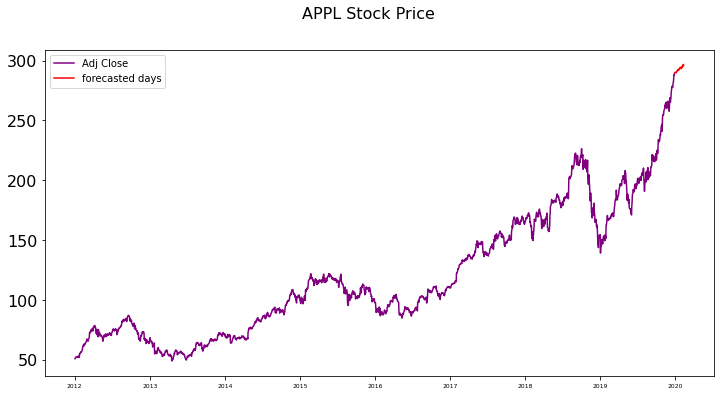

In [191]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(df['Adj Close'],label='Adj Close',color='purple')
ax.plot(f,label='forecasted days',color='red')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('APPL Stock Price', fontsize=16)
plt.show()

## 8. Pickle File

### Saving best Performiin 

In [192]:
from pickle import dump
from pickle import load

In [193]:
filename = 'pickle_file.sav'
dump(model3_fit, open('pickle_file.sav', 'wb'))

In [194]:
loaded_model = load(open('pickle_file.sav', 'rb'))
fct = pd.DataFrame(loaded_model.forecast(30))
fct

,predicted_mean
2019-12-31,289.449395
2020-01-02,289.762908
2020-01-03,290.064705
2020-01-06,289.945403
2020-01-07,289.743550
2020-01-08,289.412775
2020-01-09,289.689820
2020-01-10,290.542166
2020-01-13,290.533180
2020-01-14,290.802675
